In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from numba import njit
from heston_lsm_utils import simulate_heston_paths, simulate_bs_paths, least_squares_monte_carlo, heston_simulations, bs_simulations
from scipy.stats import ttest_rel


In [10]:
# Parameters 
np.random.seed(200)
S0 = 100
K = 100
T = 1
r = 0.05
kappa = 2.0
theta = 0.04
sigma = 0.2
rho = 0.5
v0 = 0.04
M = 100
N = 1000
num_simulations = 100

# --- Loop over theta, sigma, S0, and rho ---
theta_values = [0.04, 0.1, 0.25, 0.5]
sigma_values = [0.1, 0.2, 0.3]
rho_values = [-0.9, 0.0, 0.5, 0.9]
S0_values = [95, 100, 105]
time_grid = np.linspace(0, T, M + 1)


/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_32045/3499013100.py:15: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_32045/3499013100.py:15: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_32045/3499013100.py:15: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_32045/3499013100.py:15: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)


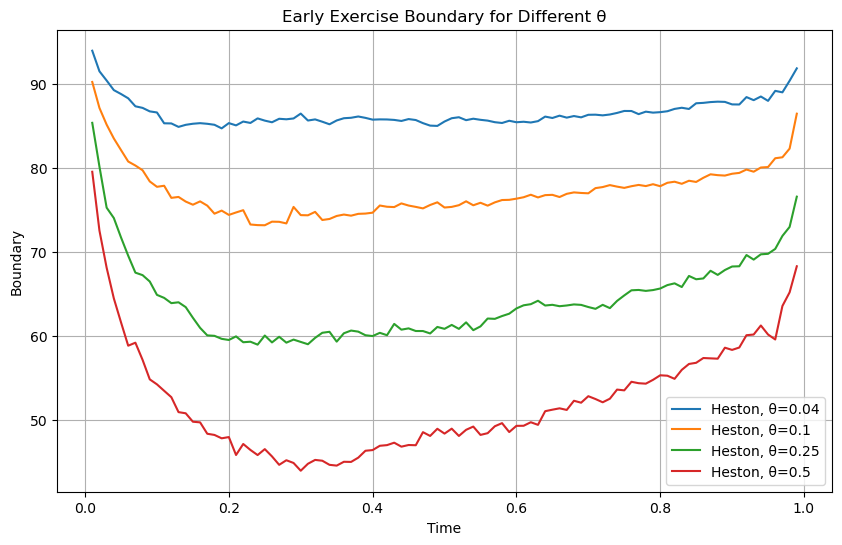

/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_32045/3499013100.py:32: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_32045/3499013100.py:32: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_32045/3499013100.py:32: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)


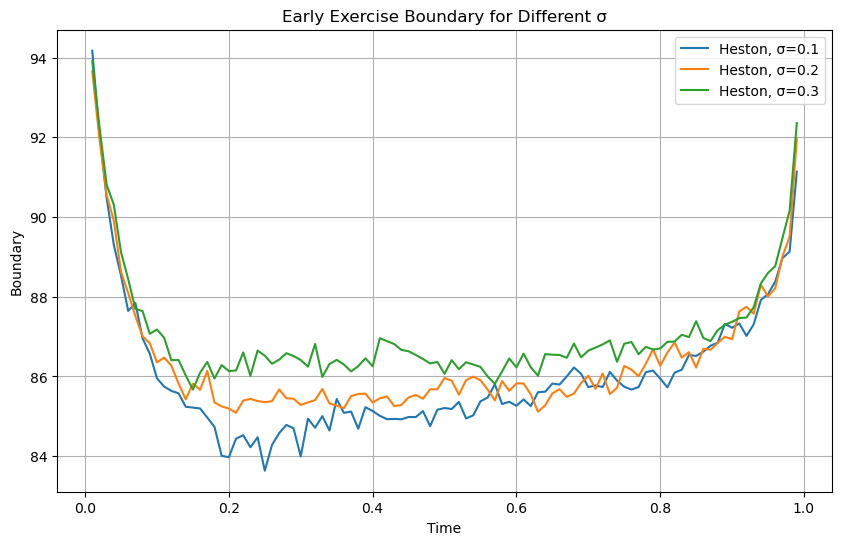

/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_32045/3499013100.py:49: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_32045/3499013100.py:49: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_32045/3499013100.py:49: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_32045/3499013100.py:49: RuntimeWarning: Mean of empty slice
  avg_boundary = np.nanmean(boundaries, axis=0)


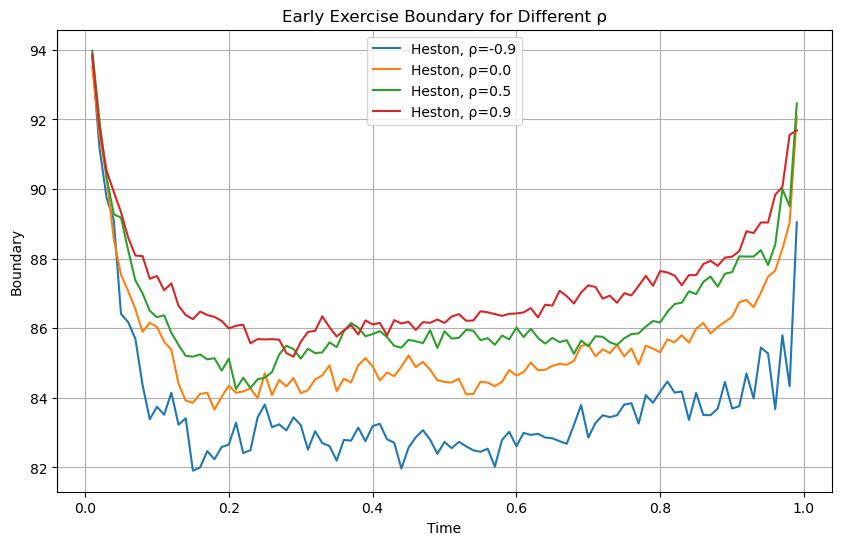

In [4]:

# --- Loop over theta, sigma, S0, and rho ---
theta_values = [0.04, 0.1, 0.25, 0.5]
sigma_values = [0.1, 0.2, 0.3]
rho_values = [-0.9, 0.0, 0.5, 0.9]
time_grid = np.linspace(0, T, M + 1)

# --- Test: effect of theta ---
plt.figure(figsize=(10, 6))
for th in theta_values:
    boundaries = []
    for _ in range(num_simulations):
        S, _ = simulate_heston_paths(S0, th, kappa, th, sigma, r, rho, T, M, N)
        _, _, boundary = least_squares_monte_carlo(S, K, r, T, M, track_boundary=True)
        boundaries.append(boundary)
    avg_boundary = np.nanmean(boundaries, axis=0)
    plt.plot(time_grid, avg_boundary, label=f"Heston, θ={th}")
plt.title("Early Exercise Boundary for Different θ")
plt.xlabel("Time")
plt.ylabel("Boundary")
plt.legend()
plt.grid(True)
plt.show()

# --- Test: effect of sigma ---
plt.figure(figsize=(10, 6))
for sig in sigma_values:
    boundaries = []
    for _ in range(num_simulations):
        S, _ = simulate_heston_paths(S0, v0, kappa, theta, sig, r, rho, T, M, N)
        _, _, boundary = least_squares_monte_carlo(S, K, r, T, M, track_boundary=True)
        boundaries.append(boundary)
    avg_boundary = np.nanmean(boundaries, axis=0)
    plt.plot(time_grid, avg_boundary, label=f"Heston, σ={sig}")
plt.title("Early Exercise Boundary for Different σ")
plt.xlabel("Time")
plt.ylabel("Boundary")
plt.legend()
plt.grid(True)
plt.show()

# --- Test: effect of rho ---
plt.figure(figsize=(10, 6))
for rh in rho_values:
    boundaries = []
    for _ in range(num_simulations):
        S, _ = simulate_heston_paths(S0, v0, kappa, theta, sigma, r, rh, T, M, N)
        _, _, boundary = least_squares_monte_carlo(S, K, r, T, M, track_boundary=True)
        boundaries.append(boundary)
    avg_boundary = np.nanmean(boundaries, axis=0)
    plt.plot(time_grid, avg_boundary, label=f"Heston, ρ={rh}")
plt.title("Early Exercise Boundary for Different ρ")
plt.xlabel("Time")
plt.ylabel("Boundary")
plt.legend()
plt.grid(True)
plt.show()


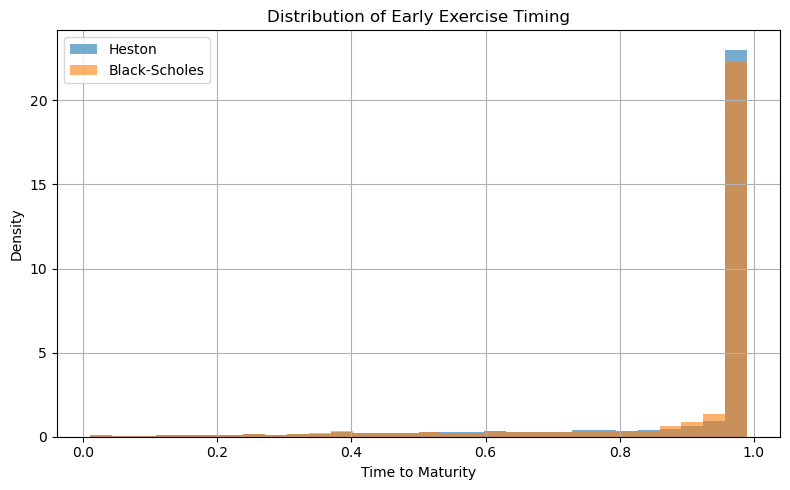

In [9]:
# --- Heston: Early Exercise Timing ---
exercise_times_heston = []
for _ in range(num_simulations):
    S, _ = simulate_heston_paths(S0, v0, kappa, theta, sigma, r, rho, T, M, N)
    _, _, _, times = least_squares_monte_carlo(S, K, r, T, M, track_boundary=True, track_timing=True)
    exercise_times_heston.append(times[~np.isnan(times)])

flat_times_heston = np.concatenate(exercise_times_heston)

# --- Black-Scholes: Early Exercise Timing ---
exercise_times_bs = []
for _ in range(num_simulations):
    S = simulate_bs_paths(S0, np.sqrt(theta), r, T, M, N)  # Constant volatility = sqrt(theta)
    _, _, times = least_squares_monte_carlo(S, K, r, T, M, track_timing=True)
    exercise_times_bs.append(times[~np.isnan(times)])

flat_times_bs = np.concatenate(exercise_times_bs)

# --- Plot both distributions ---
plt.figure(figsize=(8, 5))
plt.hist(flat_times_heston, bins=30, density=True, alpha=0.6, label='Heston')
plt.hist(flat_times_bs, bins=30, density=True, alpha=0.6, label='Black-Scholes')
plt.title("Distribution of Early Exercise Timing")
plt.xlabel("Time to Maturity")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Simulate Black-Scholes paths
np.random.seed(200)
S_bs = simulate_bs_paths(S0, np.sqrt(theta), r, T, M, N)
price_bs, freq_bs, boundary_bs = least_squares_monte_carlo(S_bs, K, r, T, M, track_boundary=True)

# Simulate Heston paths
S_heston, _ = simulate_heston_paths(S0, v0, kappa, theta, sigma, r, rho, T, M, N)
price_heston, freq_heston, boundary_heston = least_squares_monte_carlo(S_heston, K, r, T, M, track_boundary=True)

# Plot boundary comparison
plt.figure(figsize=(10, 6))
plt.plot(time_grid, boundary_bs, label="Black-Scholes")
plt.plot(time_grid, boundary_heston, label="Heston")
plt.title("Early Exercise Boundary: Black-Scholes vs. Heston")
plt.xlabel("Time")
plt.ylabel("Boundary")
plt.legend()
plt.grid(True)
plt.show()
